In [186]:
# import all required libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform KMeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To prform hierarchical clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
# load the data set
countries_df = pd.read_csv("Country-data.csv")
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Preparation

In [4]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
countries_df.shape

(167, 10)

In [7]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Looking at the statistical data the standard deviation std for "income", "gdpp" has very high value compared to their mean. This arrtibutes might have outliers which is causing standard deviation to shot up so high. 

In [61]:
# Save Country column as ID for later use
country_col_df = countries_df['country']

In [8]:
# Making the country column as ID, as its a non-numeric categorical variable
# This column later will used for cluster-proofing

data_df = countries_df.drop(['country'],axis=1)
data_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [14]:
# Check and treate null/missing values
round(100*(data_df.isnull().sum()/len(data_df.index)),2)


child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

The data set is clean as we don't have any missing values

Now, we can standardize the data by fitting and transforming using a standard scaler

In [18]:
# instantiate
scaler = StandardScaler()

# fit_transform
scaled_df = scaler.fit_transform(data_df)
scaled_df.shape

(167, 9)

### Performing PCA

In [25]:
pca = PCA(svd_solver = 'randomized', random_state=50)
pca.fit(scaled_df)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='randomized', tol=0.0, whiten=False)

In [26]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

PC1 is given by the direction - [-0.41 0.28 0.15 0.16 and so on], PC2 by [0.19 0.61 -0.24 0.61 ....] and so on. The principal components of the same number as that of the original variables with each Principal Component explaining some amount of variance of the entire dataset. This information would enable us to know which Principal Components to keep and which to discard to perform Dimensionality Reduction

In [27]:
# looking into the variance ratio
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Here we can see the PC1 compoments [-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,-0.19317293,  0.42583938, -0.40372896,  0.39264482]  explains at least 45% variance of the data set followed by PC2 17%, PC3 13%, PC4 11%. From PC5 onwards the principal components explains lesser variance in decreaing order. 

We can plot the variance ratio to observe that Principal components PC1 to PC4 explains aout 94% of covariance of the data set. 

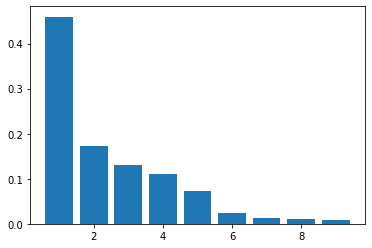

In [29]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [33]:
# Checking the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

The cumulative variance explained by the top 2 principal components is the sum of their individual variances, given by 0.45+0.17+0.13+0.11 ~= 94% %


##### The scree plot

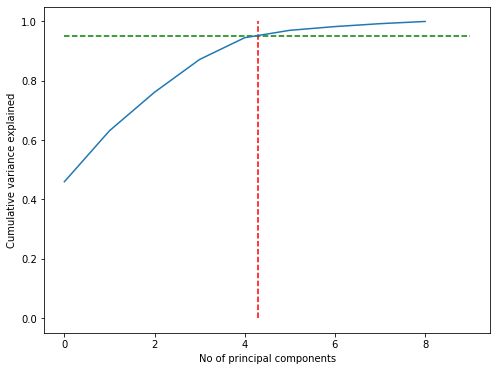

In [46]:
fig = plt.figure(figsize=[8,6])
plt.vlines(x=4.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=9, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No of principal components")
plt.show()

From teh Scree plot we can decide to keep ~=95% of variance so I can choose 5 principal components. Hence I can instantiate a new PCA function with the number of components as 5. This function will perform the dimensionality reduction on our dataset and reduce the number of columns from 9 to 5.

In [48]:
# dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [54]:
# Transform the data here
pca_nparr = pca_final.fit_transform(scaled_df)
pca_nparr.shape

(167, 5)

In [55]:
pca_nparr

array([[-2.91299992e+00,  9.19694483e-02, -7.21242475e-01,
         1.00183771e+00, -1.46764708e-01],
       [ 4.29869882e-01, -5.89373005e-01, -3.28611009e-01,
        -1.16501385e+00,  1.53205240e-01],
       [-2.85288747e-01, -4.52138721e-01,  1.23205055e+00,
        -8.57767020e-01,  1.91227155e-01],
       [-2.93271361e+00,  1.69877055e+00,  1.52507602e+00,
         8.55595497e-01, -2.14777969e-01],
       [ 1.03337146e+00,  1.33852736e-01, -2.16699200e-01,
        -8.46637655e-01, -1.93186250e-01],
       [ 2.28903436e-02, -1.77273550e+00,  8.64499533e-01,
        -3.67466174e-02,  9.97895254e-01],
       [-1.01463164e-01, -5.67317984e-01,  2.48106950e-01,
        -1.46602345e+00, -8.58319260e-02],
       [ 2.34215326e+00, -1.98970971e+00,  1.98795068e-01,
         1.11341263e+00, -7.10653789e-01],
       [ 2.97384111e+00, -7.35152104e-01, -5.28284369e-01,
         1.20110137e+00,  8.01665136e-02],
       [-1.81302843e-01, -3.96894805e-01,  8.68398935e-01,
        -4.35201409e-01

In [58]:
# creating a dataframe out of it 
pca_np_transpose = np.transpose(pca_nparr)
pca_np_transpose[0]

array([-2.91299992e+00,  4.29869882e-01, -2.85288747e-01, -2.93271361e+00,
        1.03337146e+00,  2.28903436e-02, -1.01463164e-01,  2.34215326e+00,
        2.97384111e+00, -1.81302843e-01,  1.26873963e+00,  1.67102427e+00,
       -1.12397899e+00,  1.08119637e+00,  5.80574302e-01,  3.14375619e+00,
        2.10907505e-01, -2.67300470e+00, -1.56696054e-01, -7.94150509e-01,
        9.95908594e-01, -8.81575681e-01,  1.41006684e-01,  2.46067532e+00,
        9.06504214e-01, -3.12242958e+00, -2.89891128e+00, -5.82622058e-01,
       -2.80833175e+00,  2.54377573e+00, -1.56104788e-01, -3.96515838e+00,
       -3.55824937e+00,  9.51656073e-01,  5.74753018e-02,  1.21020692e-01,
       -2.09401880e+00, -3.17342051e+00, -1.72575439e+00,  9.37737821e-01,
       -2.58213226e+00,  1.14879637e+00,  2.17440691e+00,  2.05308311e+00,
        3.01064195e+00, -2.31280333e-01,  9.44562646e-03, -8.48190862e-01,
        8.17296557e-02, -1.29326387e+00, -2.47466417e+00,  1.65888622e+00,
       -1.88839305e-01,  

In [60]:
pca_df = pd.DataFrame({'PC1':pca_np_transpose[0], 'PC2':pca_np_transpose[1], 
                       'PC3':pca_np_transpose[2], 'PC4':pca_np_transpose[3],'PC5':pca_np_transpose[4]})
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [62]:
# Adding back the ID column i.e. Country column to the given principal components
pca_df = pd.concat([pca_df, country_col_df], axis=1)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda


### Outlier treatment

In [99]:
# ploting box plots against each principal components to visualize the outliers

def visualize_outliers(pca_df):
    col_cnt=0
    plt.figure(figsize=(20, 12))
    for col in pca_df.columns:
        if col_cnt == 5:
            break        
        if str(col) != "conuntry":
            col_cnt+=1            
            plt.subplot(2,3,col_cnt)
            plt.boxplot(pca_df[col])
            plt.xlabel(str(col))
            
    plt.show() 



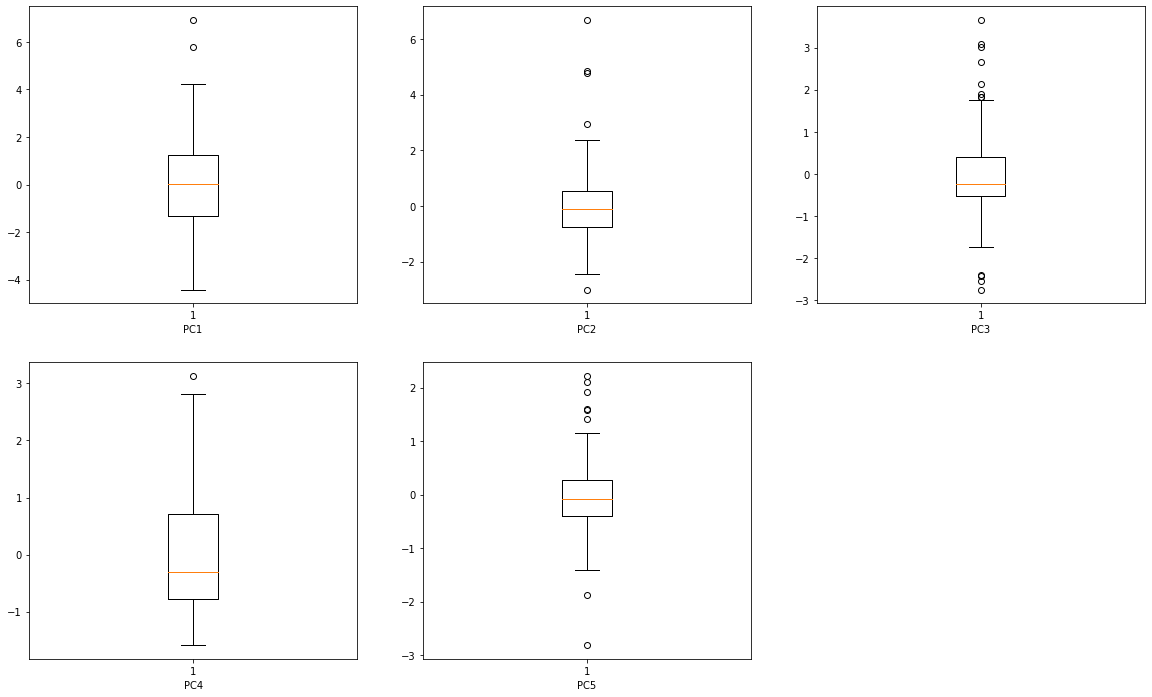

In [100]:
visualize_outliers(pca_df)

For Principal components PC2, PC3 and PC5 there are data points lying outside the boundary of box plots which suggests there are outliers in the data.
Also for PC4, the mean is not quitely centered towards '0' also could be an indication of ouliers in the data points. 

As a industry practice commonly used rule says a data points is a outliers if it is more than 1.5 * IQR. Implying the same rule here to treat the outliers

In [67]:
pca_df.shape

(167, 6)

In [68]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
PC1        167 non-null float64
PC2        167 non-null float64
PC3        167 non-null float64
PC4        167 non-null float64
PC5        167 non-null float64
country    167 non-null object
dtypes: float64(5), object(1)
memory usage: 8.0+ KB


In [101]:
# removing (statistical) outliers for PC1
# looping through PC1 to PC5 and trating outliers for 1.5 * IQR

for col in pca_df.columns:
    if str(col) == "country":
        continue
    Q1 = pca_df[col].quantile(0.05)
    Q3 = pca_df[col].quantile(0.95)
    IQR = Q3-Q1
    pca_df = pca_df[(pca_df[col] >= Q1 - 1.5*IQR) & (pca_df[col] <= Q3 + 1.5*IQR)]
        

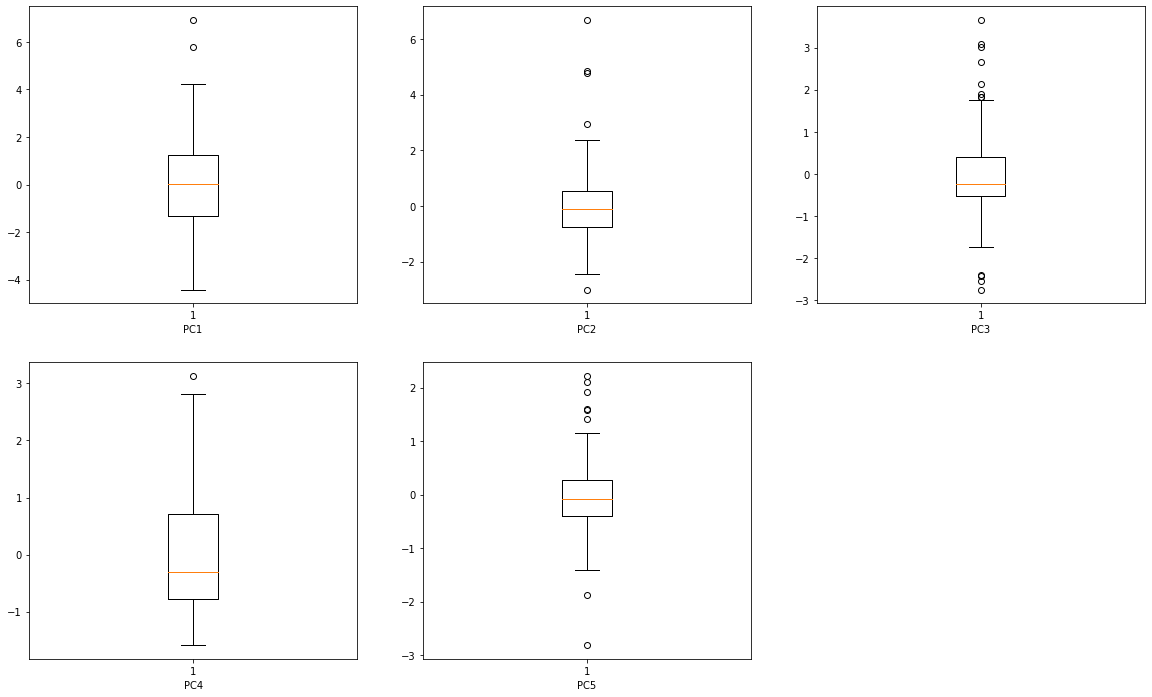

In [102]:
# lets visualie outliers after outliers treatments again
visualize_outliers(pca_df)

### Clustering 

In [104]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [107]:
#Let's check the Hopkins measure
hopkins(pca_df.drop('country',axis=1))

0.7965247938829062

The Hopkins score shows =~ 80% variance suggests data points differ significantly which is a good indication of cluster tendency. According to Hopkins rule if the value is between {0.7, ..., 0.99}, it has a high tendency to cluster. Since in this case the score is =~ 80% suggests our data points have high tendency to form cluster.

#### K-Means Clustering

In [115]:
# checking silhouette score to figure out optimal cluster

ss = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(scaled_df)
    
    cls_labels = kmeans.labels_
    silhouette_sc = silhouette_score(scaled_df,cls_labels)
    ss.append([k,silhouette_sc])
    print("For n_cluster={0}, silhouette score is {1}".format(k,silhouette_sc))


For n_cluster=2, silhouette score is 0.28735668921406704
For n_cluster=3, silhouette score is 0.28329575683463126
For n_cluster=4, silhouette score is 0.301375962376881
For n_cluster=5, silhouette score is 0.3060544006436598
For n_cluster=6, silhouette score is 0.23293312221599696
For n_cluster=7, silhouette score is 0.24619713233523322
For n_cluster=8, silhouette score is 0.25280751205410673


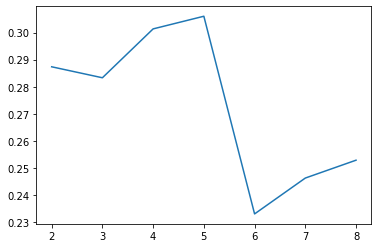

In [116]:
# plot silhouette score
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()
    

In Silhouette score plot we look for the peak, which is 5 here. So this suggests the optimal number of cluster probably be 5, hence we can choose k=5 for KMeans clustering

In [121]:
# Checking the Elbow curve plot via SSD (Sum of Squared distances) as well

ssd=[]
#n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range(1,10):
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(scaled_df)
    ssd.append(kmeans.inertia_)

ssd    

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3917199643636,
 631.2572342807227,
 550.9303043026612,
 496.0151442858558,
 455.190162293776,
 421.881196330525]

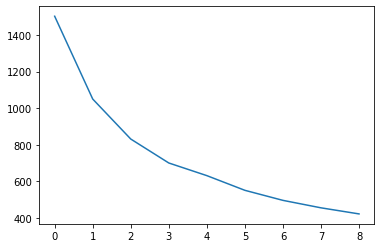

In [122]:
plt.plot(ssd)
plt.show()

The elbow break is in '1' and again in 2 and 3. This suggests that the optimal cluster could be either 4 ot 5, assuming 0 in x-axis represents 1 cluster, 1 in x-axis represents 2 clusters so on 

##### KMeans with the K the we have choosed

In [204]:
# running final kmeans with K = 4, i.e. with 4 clusters
kmeans_clus=KMeans(n_clusters=4,max_iter=50,random_state=50)
kmeans_clus.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [242]:
# merge the PC's into the pca dataframe with cluster id and country
km_df = pd.concat([pca_df.reset_index().drop('index',axis=1),pd.Series(kmeans_clus.labels_)],axis=1)
km_df.columns = ['PC1','PC2','PC3','PC4','PC5','country','KM_ClusterID']
km_df.head()

,PC1,PC2,PC3,PC4,PC5,country,KM_ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,2


In [243]:
# Check the count of observation per cluster
km_df['KM_ClusterID'].value_counts()

2    88
1    46
0    30
3     3
Name: KM_ClusterID, dtype: int64

In [244]:
km_df['KM_ClusterID'] = km_df['KM_ClusterID'].apply(lambda x: x+1)
km_df['KM_ClusterID'].value_counts()

3    88
2    46
1    30
4     3
Name: KM_ClusterID, dtype: int64

In [245]:
km_df.shape

(167, 7)

In [246]:
round(km_df.describe(),2)

,PC1,PC2,PC3,PC4,PC5,KM_ClusterID
count,166.00,166.00,166.00,166.00,166.00,167.00
mean,0.03,0.00,-0.04,-0.01,-0.03,2.38
std,2.01,1.25,0.98,0.99,0.70,0.80
min,-4.41,-3.00,-2.74,-1.59,-2.82,1.00
25%,-1.33,-0.76,-0.53,-0.79,-0.40,2.00
50%,0.02,-0.09,-0.23,-0.31,-0.07,3.00
75%,1.23,0.55,0.41,0.71,0.28,3.00
max,6.92,6.68,3.66,3.13,2.22,4.00


<function matplotlib.pyplot.show(*args, **kw)>

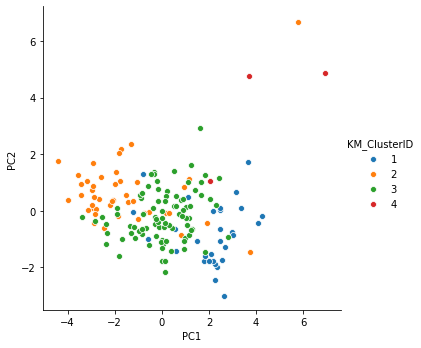

In [247]:
## Visualizing the clusters with top two Principal Components PC1 and PC2 
# chosen as X, Y axis in a pairplot 

#sns.scatterplot(x='PC1',y='PC2', hue = 'ClusterID',legend='full',data=km_df)
#sns.pairplot(data=km_df, x_vars=["PC1"], y_vars=["PC2","PC3"], hue = "ClusterID", height=5)
sns.pairplot(data=km_df, x_vars=["PC1"], y_vars=["PC2"], hue = "KM_ClusterID", height=5)
plt.show

Here we csn see that most of the data points are segrerated between cluster 1 (blue), cluster 2 (orange), cluster 3 (green) with little overlaps. Where as cluster 4 denoted in red color looks quite scattered. Thats is not a good cluster representations.

##### KMeans Cluster Profiling

In [248]:
#  merging the original data with the data(KM_ClusterID)
km_clus_merged_df = pd.merge(countries_df,km_df,how='inner',on='country')
km_clus_merged_df.drop(["PC1","PC2","PC3","PC4","PC5"],axis=1,inplace=True)
km_clus_merged_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [249]:
# considering only gdpp, child_mort and income variables
clus_final_df = km_clus_merged_df[["country","child_mort","gdpp","income","KM_ClusterID"]]
clus_final_df.head()

,country,child_mort,gdpp,income,KM_ClusterID
0,Afghanistan,90.2,553,1610,2
1,Albania,16.6,4090,9930,3
2,Algeria,27.3,4460,12900,3
3,Angola,119.0,3530,5900,2
4,Antigua and Barbuda,10.3,12200,19100,3


In [250]:
clus_final_df.shape

(166, 5)

<Figure size 432x288 with 0 Axes>

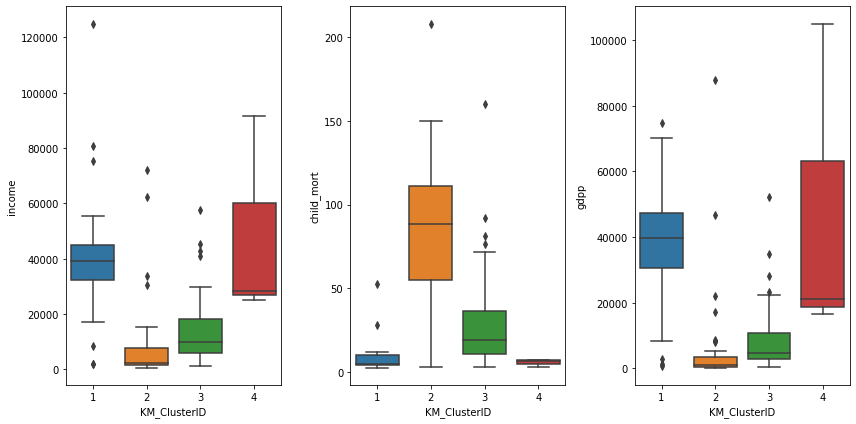

In [251]:
# plot boxplot with x-axis clusterID and y-axis income or child mortality rate to visualize
# how the data is spread among 4 different clusters
plt.figure(1)
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x='KM_ClusterID', y='income', data=clus_final_df)

plt.subplot(1,3,2)
sns.boxplot(x='KM_ClusterID', y='child_mort', data=clus_final_df)

plt.subplot(1,3,3)
sns.boxplot(x='KM_ClusterID', y='gdpp', data=clus_final_df)

plt.tight_layout()
plt.show()

By looking into the above boxplots for the each clusters we can observe 
- Countries participated in Cluster-1 has very balanced income and gdpp mean nearly 40K with very very low child mortality rate
- Countries participated in Cluster-2 has very high child mortality rate with low income ranges below 20K and low gdpp even less than 5K mean
- Countries participated in Cluster-3 has decent income but compared to income the per capita gdp is low. Where as chil-mortality is high
- Countries participated in Cluster-4 has very good income and gdpp mean arond roughly 30K with very very low kind of negligible child mortality rate. These country certainly not required any sort of aid or financial support

These suggests that countries in Cluster-2 would require Aid/Financial support in terms of helping towards the gdpp and bring down child mortality rate. 


In [252]:
# creating country specific data set group by each of these 4 clusters
C1_km_df = clus_final_df[(clus_final_df['KM_ClusterID'] == 1)]
C1_km_df.drop(['KM_ClusterID'],axis=1,inplace=True)

C2_km_df = clus_final_df[(clus_final_df['KM_ClusterID'] == 2)]
C2_km_df.drop(['KM_ClusterID'],axis=1,inplace=True)

C3_km_df = clus_final_df[(clus_final_df['KM_ClusterID'] == 3)]
C3_km_df.drop(['KM_ClusterID'],axis=1,inplace=True)

C4_km_df = clus_final_df[(clus_final_df['KM_ClusterID'] == 4)]
C4_km_df.drop(['KM_ClusterID'],axis=1,inplace=True)

/home/jmajumde/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [255]:
# curious to see India data point
India_df = clus_final_df[(clus_final_df['country'] == 'India')]
India_df

,country,child_mort,gdpp,income,KM_ClusterID
69,India,58.8,1350,4410,3


In [256]:
# list of countries which has low income, low gdpp and very high child mortality rate 
# can be seen below
C2_km_df=C2_km_df.sort_values(by=['child_mort'], ascending=False)
C2_km_df.head(15)

,country,child_mort,gdpp,income
66,Haiti,208.0,662,1500
32,Chad,150.0,897,1930
31,Central African Republic,149.0,446,888
97,Mali,137.0,708,1870
112,Niger,123.0,348,814
3,Angola,119.0,3530,5900
25,Burkina Faso,116.0,575,1430
37,"Congo, Dem. Rep.",116.0,334,609
64,Guinea-Bissau,114.0,547,1390
17,Benin,111.0,758,1820


#### Hierarchical Clustering

In [216]:
pca_df.shape

(166, 6)

In [217]:
hierarchical_pca_df = pca_df.drop(['country'], axis=1)

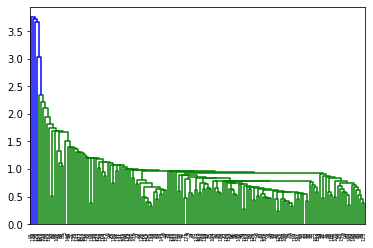

In [218]:
# single linkage
mergings = linkage(hierarchical_pca_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

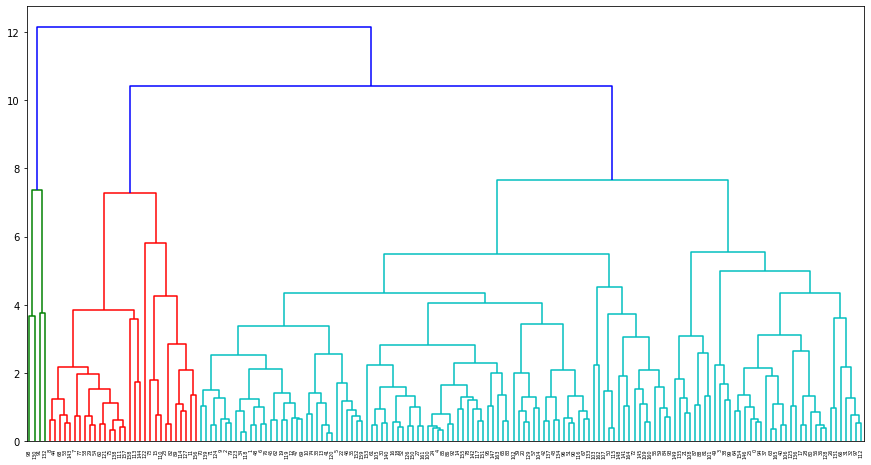

In [221]:
# complete linkage
plt.figure(figsize=(15,8))
mergings = linkage(hierarchical_pca_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Looking at the Dendogram height the no of cluster we can get between threshold 6 to 8. If we cut the tree at threshold 6, we no of cluster=6, where as if we cut the tree at threshold 8 we get no of cluster = 3. 

We have done KMeans with no of cluster 4 and we found that the data points for 4rth cluster is kind of scattered. And most of the countries which were looking for aid is converged within cluster 1. Lets take the no of cluster as 6 and see if we can reach to similar conclusion. 

In [257]:
# consider no of cluster = 6 cutting the three to label the data points
hierarchical_cluster_ids = cut_tree(mergings, n_clusters=6).reshape(-1, )
hierarchical_cluster_ids = list(map(lambda x: x+1,hierarchical_cluster_ids))
#hierarchical_cluster_ids

In [258]:
# assign cluster labels
clus_final_df['Hierarchical_ClusterID'] = hierarchical_cluster_ids
clus_final_df.head()

/home/jmajumde/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,child_mort,gdpp,income,KM_ClusterID,Hierarchical_ClusterID
0,Afghanistan,90.2,553,1610,2,1
1,Albania,16.6,4090,9930,3,2
2,Algeria,27.3,4460,12900,3,2
3,Angola,119.0,3530,5900,2,1
4,Antigua and Barbuda,10.3,12200,19100,3,2


##### Hierarchical Cluster Profiling

<Figure size 432x288 with 0 Axes>

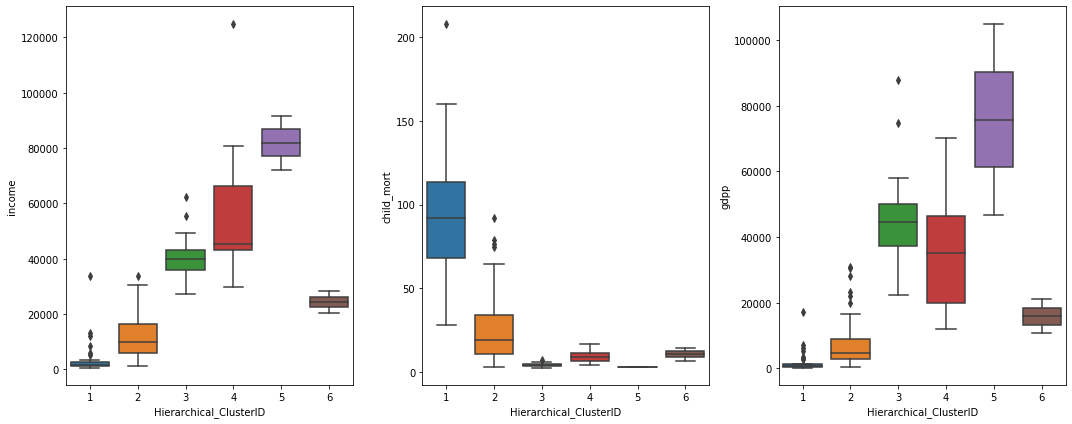

In [259]:
# plot boxplot with x-axis clusterID and y-axis income or child mortality rate to visualize
# how the data is spread among 6 different clusters for Hierarchical analysis
plt.figure(1)
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(x='Hierarchical_ClusterID', y='income', data=clus_final_df)

plt.subplot(1,3,2)
sns.boxplot(x='Hierarchical_ClusterID', y='child_mort', data=clus_final_df)

plt.subplot(1,3,3)
sns.boxplot(x='Hierarchical_ClusterID', y='gdpp', data=clus_final_df)

plt.tight_layout()
plt.show()

Looking into the above boxplots we can observe that 
- Countries participated in Cluster-1 has very low income and gdpp with very very high child mortality rate

In [263]:
# creating country specific data set group by cluster label = 1
C1_hierar_df = clus_final_df[(clus_final_df['Hierarchical_ClusterID'] == 1)]
C1_hierar_df.drop(['Hierarchical_ClusterID','KM_ClusterID'],axis=1,inplace=True)
C1_hierar_df = C1_hierar_df.sort_values(['child_mort'], ascending=False)

In [265]:
# comparing C1_hierar_df cluster top 10 records with C2_km_df top 5 records
print(C2_km_df.head(10))
print("\n")
print(C1_hierar_df.head(10))

                      country  child_mort  gdpp  income
66                      Haiti       208.0   662    1500
32                       Chad       150.0   897    1930
31   Central African Republic       149.0   446     888
97                       Mali       137.0   708    1870
112                     Niger       123.0   348     814
3                      Angola       119.0  3530    5900
25               Burkina Faso       116.0   575    1430
37           Congo, Dem. Rep.       116.0   334     609
64              Guinea-Bissau       114.0   547    1390
17                      Benin       111.0   758    1820


                      country  child_mort  gdpp  income
66                      Haiti       208.0   662    1500
131              Sierra Leone       160.0   399    1220
32                       Chad       150.0   897    1930
31   Central African Republic       149.0   446     888
97                       Mali       137.0   708    1870
112                     Niger       123.0   34

### Conclusion 

As we can see from the above data points from KMeans cluster analysis v/s Hierarchical cluster analysis we can come to a conclusion that top 10 (TEN) countries who are eligible to get the Aid/help from HELP International NGO are followings: 
    `Haiti`,`Sierra Leone`,`Chad`,`Central African Republic`,`Mali`,`Niger`,`Angola`,`Burkina Faso`,`Congo`,`Guinea-Bissau`.